In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
df = pd.read_csv('Iris Dataset.csv')

## Data information and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization

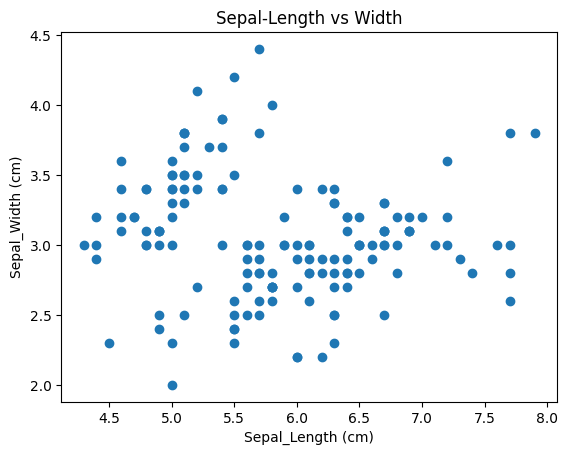

In [6]:
axis = plt.axes()

axis.scatter(df.SepalLengthCm, df.SepalWidthCm)

axis.set(xlabel='Sepal_Length (cm)',
   ylabel='Sepal_Width (cm)',
   title='Sepal-Length vs Width');

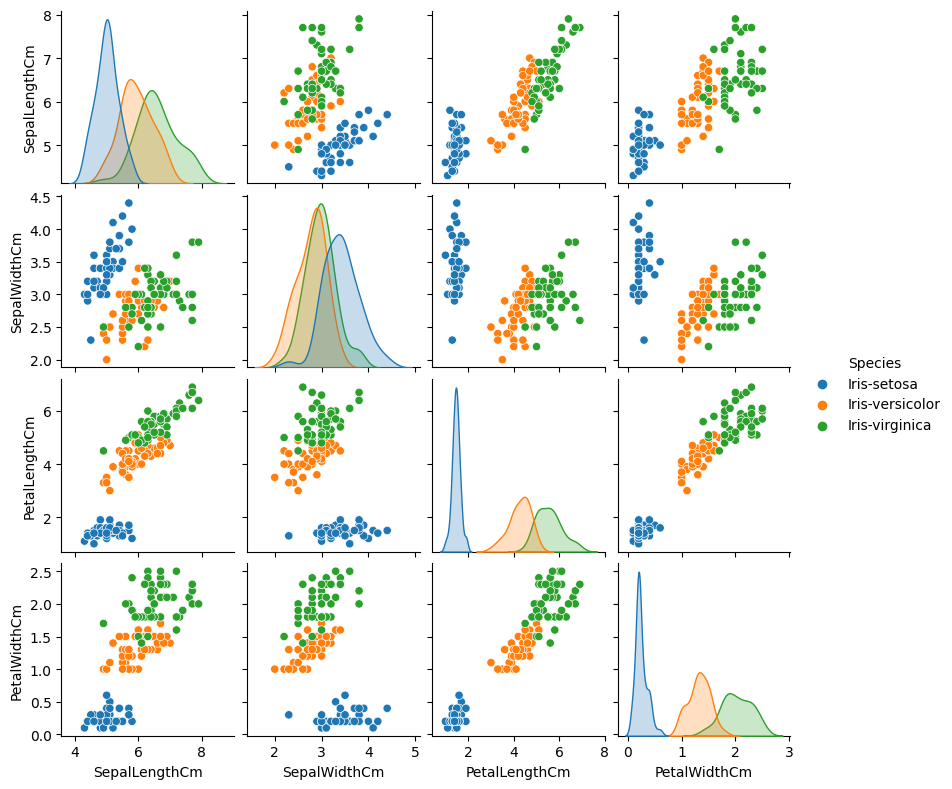

In [7]:
sns.pairplot(df.drop(['Id'], axis = 1),hue='Species', height=2)

## PCA

In [8]:
def pca(dataset):

    species = dataset['Species']
    data = dataset.drop('Species', axis=1)
    

    X = data.to_numpy()
    cov_matrix = np.cov(X.T)
    
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    projected_data = X.dot(eigenvectors[:, :3])
       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c=species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))
    ax.set_title('PCA - Projected Data')
    plt.show()
    
    print('Eigenvalues:')
    for i, eigenvalue in enumerate(eigenvalues):
        print(f'Eigenvalue {i+1}: {eigenvalue}')

## K-Means
 For accuracy use the silhoutte Coefficient

In [9]:
def k_means_clustering(dataset, num_clusters):
    species = dataset['Species']
    data = dataset.drop('Species', axis=1)
    
    X = data.to_numpy()
    
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), num_clusters, replace=False)]
    
    # Iterate until convergence
    while True:
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(num_clusters)])
        if np.all(centroids == new_centroids):
            break   
        centroids = new_centroids
    
    # Plot clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.title('K-Means Clustering')
    plt.show()
    
    # Plot actual species
    plt.scatter(X[:, 0], X[:, 1], c=species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}))
    plt.title('Actual Species')
    plt.show()
    
    silhouette_avg = silhouette_score(X, labels)
    print(f"Silhouette Coefficient: {silhouette_avg}")

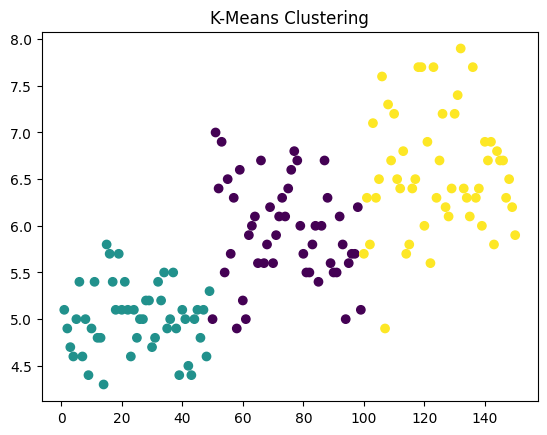

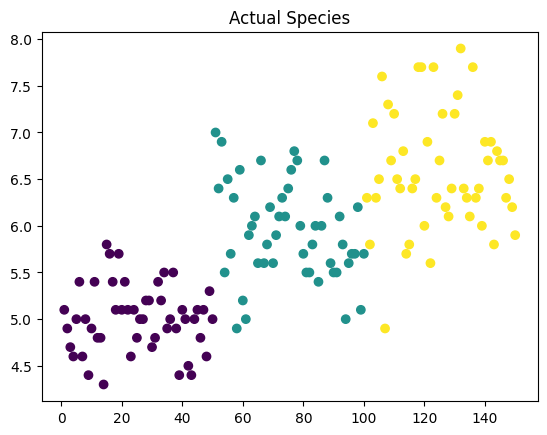

Silhouette Coefficient: 0.5816702617893469


In [10]:
k_means_clustering(df, num_clusters=3)

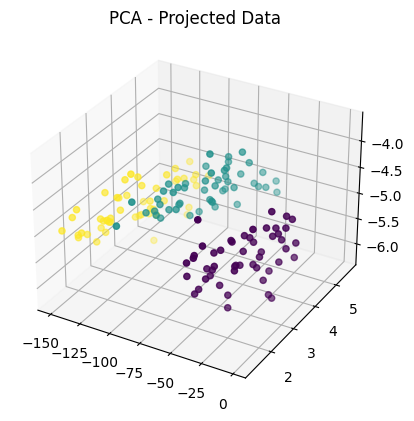

Eigenvalues:
Eigenvalue 1: 1890.7809830163478
Eigenvalue 2: 0.9732866317855753
Eigenvalue 3: 0.22299472861272368
Eigenvalue 4: 0.06929083678189908
Eigenvalue 5: 0.02273606163941734


In [11]:
pca(df)